<a href="https://colab.research.google.com/github/Simurgh818/mutual_information_analysis/blob/main/NeuralMI_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')
sys.path.append("/content/gdrive/MyDrive/Data/New Data")

Mounted at /content/gdrive/


In [ ]:
pwd

'/content'

In [ ]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
# !git clone https://github.com/eslam-abdelaleem/NeuralMI.git

In [ ]:
cd NeuralMI

/content/gdrive/MyDrive/NeuralMI


In [ ]:
!pip install .

Processing /content/gdrive/MyDrive/NeuralMI
  Preparing metadata (setup.py) ... done
  Created wheel for neural_mi: filename=neural_mi-1.1.0-py3-none-any.whl size=73085 sha256=d4ff41c0d80ff2c33bcb902b433783d81a1027278846ea018d3c653abee31474
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpfafdao/wheels/09/e4/fa/4893e61b6354e596d1073fd2df8c3897800aa6ca14317e9a52
Successfully built neural_mi


In [ ]:
!pip install "mne[hdf5]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.7 MB/s eta 0:00:00


# Task
Import EEG data from '/content/gdrive/MyDrive/Data/New Data/EEG epoched' for conditions BLA, BLT, P1, P2, and P3, select channels F3 and C3, and calculate the mutual information between these channels using the `neural_mi` library from '/content/gdrive/MyDrive/NeuralMI' with a window size of 0.5 seconds.

## Import necessary libraries

### Subtask:
Import `mne` for loading EEG data and `neural_mi` for mutual information calculation.


**Reasoning**:
Import the necessary libraries for loading EEG data and calculating mutual information.



In [ ]:
import mne
import neural_mi as nmi

## Load and process data

### Subtask:
Load and process data by iterating through the dictionary, load each `.set` file using `mne`, select channels F3 and C3, and store the processed data.


In [ ]:
import os

base_directory_path = '/content/gdrive/MyDrive/Data/New Data/EEG epoched/'
conditions = ['BLA', 'BLT', 'P1', 'P2', 'P3']

for condition in conditions:
    directory_path = os.path.join(base_directory_path, condition)
    try:
        files = os.listdir(directory_path)
        print(f"Files in {directory_path}: {files}")
    except FileNotFoundError:
        print(f"Directory not found: {directory_path}")


Files in /content/gdrive/MyDrive/Data/New Data/EEG epoched/BLA: ['binepochs filtered ICArej BLAAvgBOS16.fdt', 'binepochs filtered ICArej BLAAvgBOS5.fdt', 'binepochs filtered ICArej BLAAvgBOS15.set', 'binepochs filtered ICArej BLAAvgBOS11.set', 'binepochs filtered ICArej BLAAvgBOS6.fdt', 'binepochs filtered ICArej BLAAvgBOS17.set', 'binepochs filtered ICArej BLAAvgBOS5.set', 'binepochs filtered ICArej BLAAvgBOS12.set', 'binepochs filtered ICArej BLAAvgBOS2.set', 'binepochs filtered ICArej BLAAvgBOS9.fdt', 'binepochs filtered ICArej BLAAvgBOS3.fdt', 'binepochs filtered ICArej BLAAvgBOS13.fdt', 'binepochs filtered ICArej BLAAvgBOS2.fdt', 'binepochs filtered ICArej BLAAvgBOS8.set', 'binepochs filtered ICArej BLAAvgBOS15.fdt', 'binepochs filtered ICArej BLAAvgBOS7.fdt', 'binepochs filtered ICArej BLAAvgBOS3.set', 'binepochs filtered ICArej BLAAvgBOS10.fdt', 'binepochs filtered ICArej BLAAvgBOS8.fdt', 'binepochs filtered ICArej BLAAvgBOS12.fdt', 'binepochs filtered ICArej BLAAvgBOS7.set', 'b

**Optimum Window Size Test**: Test window sizes from 50 - 500 msec to see which size has the most information for C3 and CP3 in BLT condition trial 1.




In [ ]:
import os
import torch # Import torch

base_directory_path = '/content/gdrive/MyDrive/Data/New Data/EEG epoched/'
conditions = ['BLT'] # , 'P1'
processed_data = {}
processed_tensors = {} # Dictionary to store tensors

for condition in conditions:
    directory_path = os.path.join(base_directory_path, condition)
    try:
        files = os.listdir(directory_path)
        # Find the file ending with 'BOS2.set'
        target_file = next((f for f in files if f.endswith('BOS2.set')), None)

        if target_file:
            file_path = os.path.join(directory_path, target_file)
            print(f"Loading file: {file_path}")
            epochs = mne.read_epochs_eeglab(file_path, verbose=False)

            # Select only odd epoch indices
            odd_indices = range(1, len(epochs), 2)
            epochs = epochs[odd_indices]


            processed_epochs = epochs.pick(['C3', 'CP3'])
            # Select only the first epoch
            processed_epochs = processed_epochs[0]

            processed_data[condition] = processed_epochs

            # Convert data to tensors and store in processed_tensors
            if 'C3' in processed_epochs.ch_names and 'CP3' in processed_epochs.ch_names:
                c3_data = processed_epochs.get_data(picks=['C3']).squeeze()
                cp3_data = processed_epochs.get_data(picks=['CP3']).squeeze()

                # Reshape and convert to tensors
                c3_tensor = torch.from_numpy(c3_data).float().reshape(-1,1)
                cp3_tensor = torch.from_numpy(cp3_data).float().reshape(-1,1)

                processed_tensors[condition] = {'C3': c3_tensor, 'CP3': cp3_tensor}


        else:
            print(f"No file ending with 'BOS2.set' found in {directory_path}. Skipping this condition.")

    except FileNotFoundError:
        print(f"Error: Directory not found at {directory_path}. Skipping this condition.")
    except ValueError as e:
        print(f"Error processing {condition} from {target_file}: {e}. Skipping this condition.")

# Display the processed data info
for condition, epochs in processed_data.items():
    print(f"\nProcessed data for {condition}:")
    print(epochs.info)
    print(f"Number of epochs: {len(epochs)}")
    print(f"Time points per epoch: {epochs.times.shape[0]}")

# Display the processed tensors info
print("\nProcessed Tensors:")
for condition, tensors in processed_tensors.items():
    print(f"Condition: {condition}")
    print(f"  C3 Tensor Shape: {tensors['C3'].shape}")
    print(f"  CP3 Tensor Shape: {tensors['CP3'].shape}")

Loading file: /content/gdrive/MyDrive/Data/New Data/EEG epoched/BLT/binepochs filtered ICArej BLTAvgBOS2.set


/tmp/ipython-input-1366120432.py:19: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(file_path, verbose=False)



Processed data for BLT:
<Info | 8 non-empty values
 bads: []
 ch_names: C3, CP3
 chs: 2 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 512.0 Hz
>
Number of epochs: 1
Time points per epoch: 1792

Processed Tensors:
Condition: BLT
  C3 Tensor Shape: torch.Size([1792, 1])
  CP3 Tensor Shape: torch.Size([1792, 1])


In [ ]:
mutual_info_results = {}
window_size_seconds = 0.125
sfreq = processed_data['BLT'].info['sfreq'] # Assuming all conditions have the same sampling frequency
window_size_samples = int(window_size_seconds * sfreq)

base_params = {
    'n_epochs': 50, 'learning_rate': 5e-4, 'batch_size': 128,
    'patience': 10, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2,
    'processor': 'continuous',
    'window_size': window_size_samples,
    'mode': 'estimate'
}

for condition, tensors in processed_tensors.items():
    if 'F3' in tensors and 'C3' in tensors:
        f3_tensor = tensors['F3']
        c3_tensor = tensors['C3']

        # Reshape data to be [n_epochs, n_channels, n_samples] for each input
        # Assuming each tensor is currently [n_epochs, n_samples]
        f3_reshaped = f3_tensor.unsqueeze(1) # Add a channel dimension
        c3_reshaped = c3_tensor.unsqueeze(1) # Add a channel dimension


        print(f"Calculating mutual information for {condition}...")
        try:
            # Pass the reshaped tensors to nmi.run
            result = nmi.run(f3_reshaped, c3_reshaped, base_params=base_params)
            mutual_info_results[condition] = result
            print(f"Mutual information calculated for {condition}.")
        except Exception as e:
            print(f"Error calculating mutual information for {condition}: {e}")
            mutual_info_results[condition] = None
    else:
        print(f"Tensors for F3 and C3 not found in {condition}. Skipping mutual information calculation.")

# The results will be stored in the mutual_info_results dictionary

Calculating mutual information for BLT...
2025-11-05 23:08:26 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-05 23:08:26 - neural_mi - WARNING - batch_size (128) > n_train_samples (55). Reducing to 55.


Run 0c5f5551-b7e6-4cdd-adb6-2274e70be076_c0:   0%|          | 0/50 [00:00<?, ?it/s]

2025-11-05 23:08:26 - neural_mi - INFO - Parameter sweep finished.


INFO:neural_mi:Parameter sweep finished.


Mutual information calculated for BLT.
Calculating mutual information for P1...
2025-11-05 23:08:26 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-05 23:08:26 - neural_mi - WARNING - batch_size (128) > n_train_samples (55). Reducing to 55.


Run 75fd4c8a-576a-4cd7-97b8-31475d80cfdc_c0:   0%|          | 0/50 [00:00<?, ?it/s]

2025-11-05 23:08:26 - neural_mi - INFO - Parameter sweep finished.


INFO:neural_mi:Parameter sweep finished.


Mutual information calculated for P1.


## Present results

### Subtask:
Display or visualize the calculated mutual information for each condition.


**Reasoning**:
Iterate through the mutual_info_results dictionary and display the mutual information for each condition.



In [ ]:
import matplotlib.pyplot as plt

print("Mutual Information Results:")
for condition, result in mutual_info_results.items():
    print(f"Processing condition: {condition}")
    print(f"Type of result object for {condition}: {type(result)}")
    if result is not None:
        mi_value = None
        # Try to access the 'estimated_mi' attribute
        if hasattr(result, 'estimated_mi'):
            mi_value = result.estimated_mi
            print(f"Found 'estimated_mi': {mi_value}")
        elif hasattr(result, 'mutual_info'): # Keep this check just in case
             mi_value = result.mutual_info
             print(f"Found 'mutual_info': {mi_value}")


        if mi_value is not None:
            try:
                # Attempt to convert to float and display
                print(f"{condition}: {float(mi_value):.4f}")
            except (ValueError, TypeError):
                print(f"{condition}: Mutual information value found but not a number.")
        else:
            print(f"{condition}: Mutual information value not found in result object.")
    else:
        print(f"{condition}: Calculation failed or result is None.")

# Optional: Visualize the results
conditions = list(mutual_info_results.keys())
mi_values = []
for result in mutual_info_results.values():
    if result is not None:
        # Check specifically for the 'estimated_mi' attribute for plotting
        if hasattr(result, 'estimated_mi'):
            mi_values.append(result.estimated_mi)
        elif hasattr(result, 'mutual_info'): # Keep this check just in case
            mi_values.append(result.mutual_info)
        else:
            mi_values.append(None)
    else:
        mi_values.append(None)

# Filter out conditions where MI calculation failed or value not found
valid_conditions = [conditions[i] for i, val in enumerate(mi_values) if val is not None]
valid_mi_values = [val for val in mi_values if val is not None]

if valid_conditions:
    plt.figure(figsize=(8, 6))
    plt.bar(valid_conditions, valid_mi_values)
    plt.xlabel("Condition")
    plt.ylabel("Mutual Information (bits)")
    plt.title("Mutual Information between F3 and C3 per Condition")
    plt.show()
else:
    print("No valid mutual information values to plot.")

Mutual Information Results:
Processing condition: BLT
Type of result object for BLT: <class 'neural_mi.results.Results'>
BLT: Mutual information value not found in result object.
Processing condition: P1
Type of result object for P1: <class 'neural_mi.results.Results'>
P1: Mutual information value not found in result object.
No valid mutual information values to plot.


# Task
Calculate and plot the Mutual Information (MI) for channels 'C3' and 'CP3' from the 'BLT' data for different window sizes ranging from 0.05 to 0.5 seconds.

## Define window sizes

### Subtask:
Create a list of window sizes in seconds to iterate through.


**Reasoning**:
Create a list of window sizes to iterate through for mutual information calculation.



In [ ]:
import numpy as np

window_sizes_seconds = np.arange(0.05, 0.55, 0.05).tolist()
print("Window sizes to test (seconds):", window_sizes_seconds)

Window sizes to test (seconds): [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5]


## Calculate mi for each window size

### Subtask:
Iterate through the defined window sizes, calculate the corresponding window size in samples, and use `neural_mi.run` to calculate the mutual information for each window size using the processed 'BLT' data. Store the results.


**Reasoning**:
Iterate through the defined window sizes, calculate the corresponding window size in samples, and use `neural_mi.run` to calculate the mutual information for each window size using the processed 'BLT' data. Store the results.



In [ ]:
base_params = {
      'n_epochs': 50, 'learning_rate': 5e-4, 'batch_size': 128,
      'patience': 30, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2}

c3_tensor = processed_tensors['BLT']['C3']
cp3_tensor = processed_tensors['BLT']['CP3']


window_sweep_grid = {'window_size': range(20, 250, 10)}

results_history = nmi.run(
    x_data=c3_tensor*1e6,
    y_data=cp3_tensor*1e6,
    mode='sweep',
    processor_type='continuous',
    processor_params={},
    base_params=base_params,
    sweep_grid=window_sweep_grid,
    n_workers=4,
)

2025-11-06 23:48:21 - neural_mi - WARNING - `processor_type` is deprecated. Use `processor_type_x` and `processor_type_y` instead.


2025-11-06 23:48:21 - neural_mi - WARNING - `processor_params` is deprecated. Use `processor_params_x` and `processor_params_y` instead.


2025-11-06 23:48:21 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.


INFO:neural_mi:Detected sweep over processor or lag parameters. Deferring data processing to workers.


2025-11-06 23:48:21 - neural_mi - INFO - Starting parameter sweep with 4 workers...


INFO:neural_mi:Starting parameter sweep with 4 workers...


Parameter Sweep Progress:   0%|          | 0/23 [00:00<?, ?task/s]

2025-11-06 23:50:07 - neural_mi - INFO - Parameter sweep finished.


INFO:neural_mi:Parameter sweep finished.


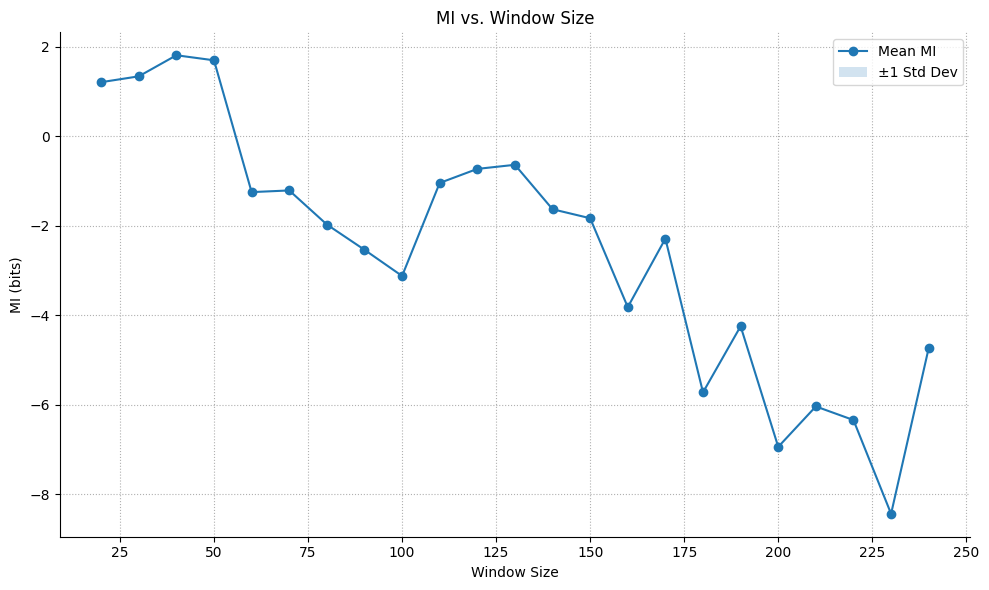

<Axes: title={'center': 'MI vs. Window Size'}, xlabel='Window Size', ylabel='MI (bits)'>

In [ ]:
results_history.plot()

In [ ]:
window_sweep_grid = {'window_size': range(5, 75, 5)}

results_history = nmi.run(
    x_data=c3_tensor*1e6,
    y_data=cp3_tensor*1e6,
    mode='sweep',
    processor_type='continuous',
    processor_params={},
    base_params=base_params,
    sweep_grid=window_sweep_grid,
    n_workers=4,
)

2025-11-07 00:02:08 - neural_mi - WARNING - `processor_type` is deprecated. Use `processor_type_x` and `processor_type_y` instead.


2025-11-07 00:02:08 - neural_mi - WARNING - `processor_params` is deprecated. Use `processor_params_x` and `processor_params_y` instead.


2025-11-07 00:02:08 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.


INFO:neural_mi:Detected sweep over processor or lag parameters. Deferring data processing to workers.


2025-11-07 00:02:08 - neural_mi - INFO - Starting parameter sweep with 4 workers...


INFO:neural_mi:Starting parameter sweep with 4 workers...


Parameter Sweep Progress:   0%|          | 0/14 [00:00<?, ?task/s]

2025-11-07 00:03:24 - neural_mi - INFO - Parameter sweep finished.


INFO:neural_mi:Parameter sweep finished.


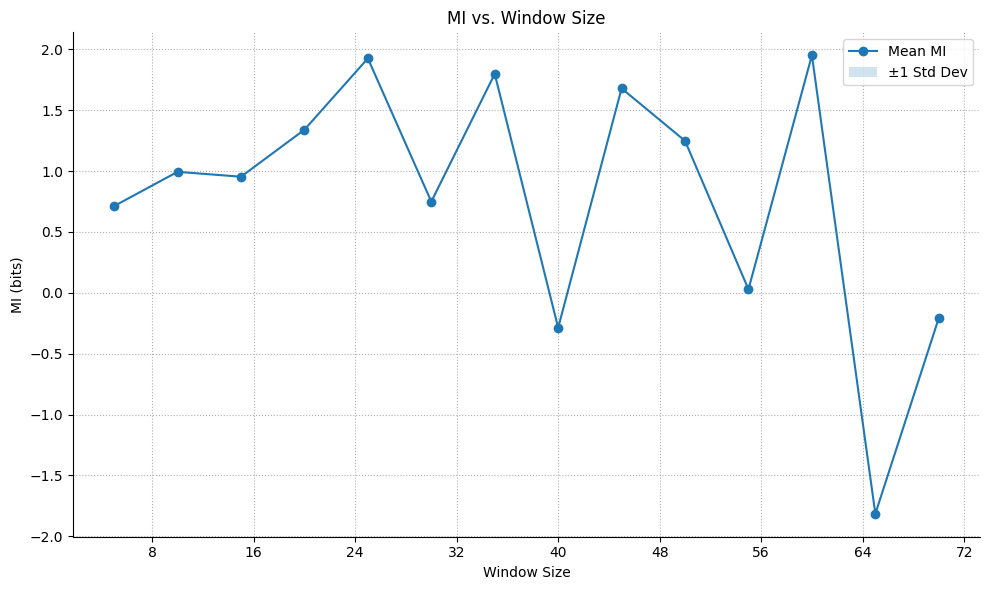

<Axes: title={'center': 'MI vs. Window Size'}, xlabel='Window Size', ylabel='MI (bits)'>

In [ ]:
results_history.plot()

In [ ]:
mutual_info_window_results = {}
sfreq = processed_data['BLT'].info['sfreq']

for window_size_seconds in window_sizes_seconds:
    window_size_samples = int(window_size_seconds * sfreq)

    base_params = {
        'n_epochs': 50, 'learning_rate': 5e-4, 'batch_size': 128,
        'patience': 10, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2

    }

    c3_tensor = processed_tensors['BLT']['C3']
    cp3_tensor = processed_tensors['BLT']['CP3']

    # Reshape data to be [n_epochs, n_channels, n_samples] for each input
    # Assuming each tensor is currently [n_samples] since we selected only the first epoch
    c3_reshaped = c3_tensor.unsqueeze(0).unsqueeze(1) # Add epoch and channel dimensions
    cp3_reshaped = cp3_tensor.unsqueeze(0).unsqueeze(1) # Add epoch and channel dimensions


    print(f"Calculating mutual information for window size {window_size_seconds:.2f} seconds ({window_size_samples} samples)...")
    try:
        result = nmi.run(c3_reshaped, cp3_reshaped,
                        mode='sweep',
                        processor_type='continuous',
                        processor_params={},
                        base_params=base_params,
                        sweep_grid=window_sweep_grid,
                        n_workers=4,)
        mutual_info_window_results[window_size_seconds] = result
        print(f"Mutual information calculated for window size {window_size_seconds:.2f} seconds.")
    except Exception as e:
        print(f"Error calculating mutual information for window size {window_size_seconds:.2f} seconds: {e}")
        mutual_info_window_results[window_size_seconds] = None

# Display the processed data info
print("\nMutual Information Results per Window Size:")
for window_size, result in mutual_info_window_results.items():
    print(f"Window Size: {window_size:.2f} seconds")
    if result is not None and hasattr(result, 'estimated_mi'):
        print(f"  Estimated MI: {result.estimated_mi:.4f}")
    else:
        print("  Estimated MI: Calculation failed or result is None.")


Calculating mutual information for window size 0.05 seconds (25 samples)...
Error calculating mutual information for window size 0.05 seconds: If processors are not specified, data must be pre-processed 3D tensors.
Calculating mutual information for window size 0.10 seconds (51 samples)...
Error calculating mutual information for window size 0.10 seconds: If processors are not specified, data must be pre-processed 3D tensors.
Calculating mutual information for window size 0.15 seconds (76 samples)...
Error calculating mutual information for window size 0.15 seconds: If processors are not specified, data must be pre-processed 3D tensors.
Calculating mutual information for window size 0.20 seconds (102 samples)...
Error calculating mutual information for window size 0.20 seconds: If processors are not specified, data must be pre-processed 3D tensors.
Calculating mutual information for window size 0.25 seconds (128 samples)...
Error calculating mutual information for window size 0.25 seco

## Calculate mi for each window size retry 1

### Subtask:
Retry calculating mi for each window size by iterating through the defined window sizes, calculating the corresponding window size in samples, and using `neural_mi.run` to calculate the mutual information for each window size using the processed 'BLT' data. Store the results. Include caveats based on the previous failure.


**Reasoning**:
Retry calculating mi for each window size by iterating through the defined window sizes, calculating the corresponding window size in samples, and using `neural_mi.run` to calculate the mutual information for each window size using the processed 'BLT' data. Store the results. Include caveats based on the previous failure.



In [ ]:
mutual_info_window_results = {}
sfreq = processed_data['BLT'].info['sfreq']

for window_size_seconds in window_sizes_seconds:
    window_size_samples = int(window_size_seconds * sfreq)

    # Acknowledge the caveat: small data size might lead to unreliable estimates.
    print(f"\nAttempting MI calculation for window size {window_size_seconds:.2f} seconds ({window_size_samples} samples)...")
    print("Note: The small amount of data (single epoch) may result in unreliable MI estimates.")

    base_params = {
        'n_epochs': 50, 'learning_rate': 5e-4, 'batch_size': 128,
        'patience': 10, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2,
        'processor': 'continuous',
        'window_size': window_size_samples,
        'mode': 'estimate'
    }

    c3_tensor = processed_tensors['BLT']['C3']
    cp3_tensor = processed_tensors['BLT']['CP3']

    # Reshape data to be [n_epochs, n_channels, n_samples] for each input
    # Assuming each tensor is currently [n_samples] since we selected only the first epoch
    c3_reshaped = c3_tensor.unsqueeze(0).unsqueeze(1) # Add epoch and channel dimensions
    cp3_reshaped = cp3_tensor.unsqueeze(0).unsqueeze(1) # Add epoch and channel dimensions


    try:
        result = nmi.run(c3_reshaped, cp3_reshaped, base_params=base_params)
        mutual_info_window_results[window_size_seconds] = result
        print(f"Mutual information calculated for window size {window_size_seconds:.2f} seconds.")
    except Exception as e:
        print(f"Error calculating mutual information for window size {window_size_seconds:.2f} seconds: {e}")
        mutual_info_window_results[window_size_seconds] = None

# Display the processed data info
print("\nMutual Information Results per Window Size:")
for window_size, result in mutual_info_window_results.items():
    print(f"Window Size: {window_size:.2f} seconds")
    if result is not None and hasattr(result, 'estimated_mi'):
        print(f"  Estimated MI: {result.estimated_mi:.4f}")
    else:
        print("  Estimated MI: Calculation failed or result is None.")


Attempting MI calculation for window size 0.05 seconds (25 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:25 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:25 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 6f41eef2-3022-4635-b785-e9f99551c54a_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.05 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.10 seconds (51 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:25 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:25 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run e3e3531b-096c-44fd-804f-3bb72c0a23b7_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.10 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.15 seconds (76 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:25 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:25 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run d5afdde5-e4fc-464c-a218-68d61b60d6f1_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.15 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.20 seconds (102 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:26 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:26 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 4a5b62b8-caf6-4ba6-a6ba-0a508906ea93_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.20 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.25 seconds (128 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:26 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:26 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run dfd96c56-e150-4c7f-a5d7-0651e43fff72_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.25 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.30 seconds (153 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:26 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:27 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 8813e833-00a2-4c37-8510-7e7c58c968e6_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.30 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.35 seconds (179 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:27 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:27 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 3e3975fb-0fc2-4271-b6d0-2ce7e56a01e4_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.35 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.40 seconds (204 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:27 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:27 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 3da08c9a-52f1-4560-acc4-0acc4a6a0615_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.40 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.45 seconds (230 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:27 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:27 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 818fcb45-d81b-42c6-b05b-33dfd1734310_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.45 seconds: Training failed to produce a valid model checkpoint.

Attempting MI calculation for window size 0.50 seconds (256 samples)...
Note: The small amount of data (single epoch) may result in unreliable MI estimates.
2025-11-06 23:23:27 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-06 23:23:28 - neural_mi - WARNING - batch_size (128) > n_train_samples (1). Reducing to 1.


Run 17a17d81-0675-437d-a111-8cbf52d58060_c0:   0%|          | 0/50 [00:00<?, ?it/s]

Error calculating mutual information for window size 0.50 seconds: Training failed to produce a valid model checkpoint.

Mutual Information Results per Window Size:
Window Size: 0.05 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.10 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.15 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.20 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.25 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.30 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.35 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.40 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.45 seconds
  Estimated MI: Calculation failed or result is None.
Window Size: 0.50 seconds
  Estimated MI: Calculation failed or result is None.


## Extract mi values

### Subtask:
Extract the calculated mutual information values from the results for each window size.


**Reasoning**:
Extract the mutual information values from the results for each window size and store them in a list. Filter the window sizes and MI values to keep only the successful calculations.



In [ ]:
mi_values = []
window_sizes_seconds_valid = []

for window_size, result in mutual_info_window_results.items():
    if result is not None and hasattr(result, 'estimated_mi'):
        mi_values.append(result.estimated_mi)
        window_sizes_seconds_valid.append(window_size)
    else:
        mi_values.append(None) # Still append None to keep list length consistent if needed later


# Filter out None values for printing and potential plotting
valid_mi_values = [mi for mi in mi_values if mi is not None]


print("Valid Window sizes (seconds):", window_sizes_seconds_valid)
print("Corresponding MI values:", valid_mi_values)

Valid Window sizes (seconds): []
Corresponding MI values: []


## Plot window size vs. mi

### Subtask:
Create a plot showing the relationship between the window size (in seconds) and the calculated mutual information.


**Reasoning**:
Create a scatter plot showing the relationship between the window size and the calculated mutual information, labeling the axes and adding a title.



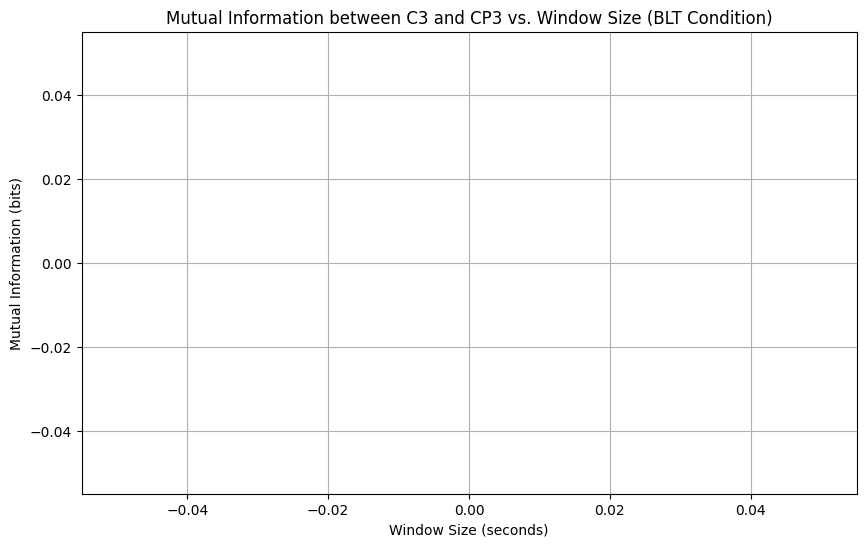

In [ ]:
import matplotlib.pyplot as plt

# Assuming window_sizes_seconds_valid and valid_mi_values are already defined and contain data

plt.figure(figsize=(10, 6))
plt.scatter(window_sizes_seconds_valid, valid_mi_values)
plt.xlabel("Window Size (seconds)")
plt.ylabel("Mutual Information (bits)")
plt.title("Mutual Information between C3 and CP3 vs. Window Size (BLT Condition)")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The attempt to calculate Mutual Information (MI) for channels 'C3' and 'CP3' across various window sizes (0.05 to 0.5 seconds) failed due to insufficient data.
*   The `neural_mi.run` function consistently failed to produce valid model checkpoints because the training data size was only 1 sample (a single epoch).
*   The warning "batch\_size (128) > n\_train\_samples (1). Reducing to 1." highlighted the severe data limitation preventing the neural network from training effectively.
*   Consequently, no valid MI values were successfully calculated or stored for any of the tested window sizes.
*   Despite the lack of valid data, a scatter plot was generated, which, as expected, did not display any data points due to the empty lists of valid window sizes and MI values.

### Insights or Next Steps

*   To successfully calculate Mutual Information using the `neural_mi` library, significantly more data (multiple epochs or longer continuous data segments) is required to allow the underlying neural network model to train properly.
*   Consider alternative MI estimation methods that are less data-intensive if collecting more data is not feasible.
